Weighted Pre-Treatment Speed: 12.67 mph
Weighted Post-Treatment Speed: 12.46 mph
T-Statistic: 4.116, P-Value: 0.000


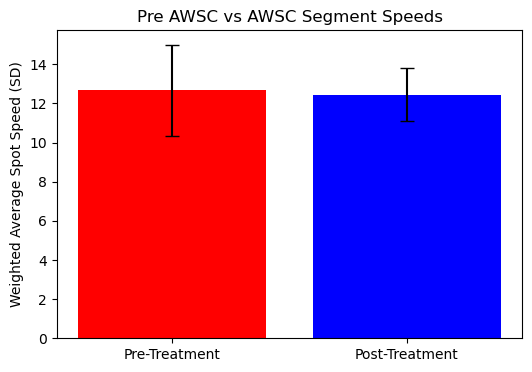

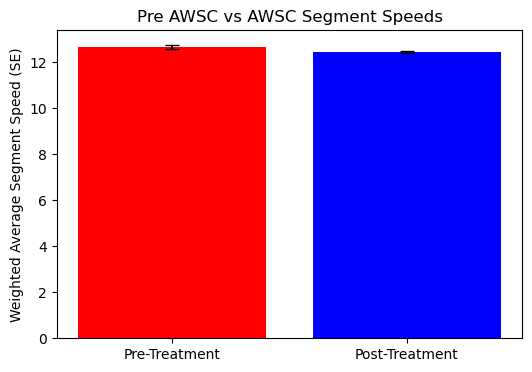

       pre_speeds  post_speeds
count  732.000000   837.000000
mean    13.609290    12.939068
std      2.476775     1.462405
min      7.000000     9.000000
25%     12.000000    12.000000
50%     13.500000    13.000000
75%     15.000000    14.000000
max     22.000000    20.000000


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/pre_seg.csv')
post_treatment = pd.read_csv('data/post_seg.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)



In [19]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['95th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('85th Speed Percentile', ascending = False).head(10)
top_speed

Weighted Pre-Treatment 85th Speed Percentile: 12.75 mph
Weighted Post-Treatment 85th Speed Percentile: 16.65 mph
Weighted Pre-Treatment 95th Speed Percentile: 15.37 mph
Weighted Post-Treatment 95th Speed Percentile: 19.97 mph
Highest value for pre-treatment'85th Speed Percentile': 34.0 mph Highest value for post-treatment'85th Speed Percentile': 26.0 mph
Data Periods                                             Jan 01, 2019 - Dec 31, 2019
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                               Hart Street / 1015688960 / 1
Line Zone Length (Miles)                                                       0.069
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         270
Zone is Bi-Direction                            

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,85th Speed Percentile,95th Speed Percentile,pre_date_range
766,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-09,7: Sunday (Su-Su),...,16.0,16.0,17.611,0.889,3.83,0.03,3.0,31.0,34.0,"Jan 01, 2019 - Dec 31, 2019"
186,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-03,1: Monday (M-M),...,12.0,20.0,19.132,0.639,9.42,0.28,2.0,28.0,42.0,"Jan 01, 2019 - Dec 31, 2019"
310,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-04,6: Saturday (Sa-Sa),...,11.0,22.0,18.290,0.614,5.42,0.19,3.0,27.0,29.0,"Jan 01, 2019 - Dec 31, 2019"
584,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-07,7: Sunday (Su-Su),...,12.0,20.0,20.549,0.599,6.53,0.21,3.0,25.0,26.0,"Jan 01, 2019 - Dec 31, 2019"
302,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-04,5: Friday (F-F),...,10.0,26.0,18.290,0.534,7.80,0.37,2.0,24.0,24.0,"Jan 01, 2019 - Dec 31, 2019"
487,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-06,6: Saturday (Sa-Sa),...,13.0,20.0,19.576,0.641,6.77,0.19,6.0,24.0,29.0,"Jan 01, 2019 - Dec 31, 2019"
676,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-08,7: Sunday (Su-Su),...,13.0,19.0,20.232,0.666,4.37,0.11,4.0,24.0,24.0,"Jan 01, 2019 - Dec 31, 2019"
974,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 32356829 / 1,0.068,yes,270,yes,2019-11,3: Wednesday (W-W),...,17.0,14.0,19.803,0.858,8.25,0.07,11.0,23.0,24.0,"Jan 01, 2019 - Dec 31, 2019"
947,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-11,6: Saturday (Sa-Sa),...,12.0,21.0,18.302,0.637,4.97,0.15,2.0,23.0,23.0,"Jan 01, 2019 - Dec 31, 2019"
555,"Jan 01, 2019 - Dec 31, 2019",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2019-07,2: Tuesday (Tu-Tu),...,12.0,21.0,20.549,0.571,7.44,0.27,9.0,23.0,25.0,"Jan 01, 2019 - Dec 31, 2019"


In [21]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Segment Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Segment Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 72,179
Total Post-Treatment Volume: 106,856
Combined Volume (Pre + Post): 179,035


In [39]:
pre_dates = filtered_pre['Data Periods']
post_dates = filtered_post['Data Periods']
print(f"Pre-Treatment Dates: {pre_dates}")

Pre-Treatment Dates: 7       Jan 01, 2019 - Dec 31, 2019
8       Jan 01, 2019 - Dec 31, 2019
9       Jan 01, 2019 - Dec 31, 2019
10      Jan 01, 2019 - Dec 31, 2019
12      Jan 01, 2019 - Dec 31, 2019
                   ...             
1088    Jan 01, 2019 - Dec 31, 2019
1089    Jan 01, 2019 - Dec 31, 2019
1090    Jan 01, 2019 - Dec 31, 2019
1091    Jan 01, 2019 - Dec 31, 2019
1092    Jan 01, 2019 - Dec 31, 2019
Name: Data Periods, Length: 781, dtype: object


In [40]:
pre_treatment['Pre_Date'] = pre_dates
post_treatment['Pre_Date'] = post_dates

In [41]:
post_treatment.head()

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,85th Speed Percentile,95th Speed Percentile,Pre_Date
7,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2021-01,1: Monday (M-M),...,15.0,17.0,19.889,0.756,1.85,0.03,NaN,NaN,NaN,"Jan 01, 2021 - Dec 31, 2021"
8,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2021-01,1: Monday (M-M),...,11.0,23.0,19.889,0.557,8.48,0.34,3.0,17.0,19.0,"Jan 01, 2021 - Dec 31, 2021"
9,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2021-01,1: Monday (M-M),...,12.0,20.0,19.889,0.620,22.82,0.70,4.0,18.0,27.0,"Jan 01, 2021 - Dec 31, 2021"
10,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2021-01,1: Monday (M-M),...,12.0,21.0,19.889,0.585,17.73,0.63,3.0,16.0,20.0,"Jan 01, 2021 - Dec 31, 2021"
11,"Jan 01, 2021 - Dec 31, 2021",All Vehicles - StL All Vehicles Volume,NaN,Hart Street / 1015688960 / 1,0.069,yes,270,yes,2021-01,1: Monday (M-M),...,13.0,19.0,19.889,0.648,8.48,0.23,4.0,18.0,24.0,"Jan 01, 2021 - Dec 31, 2021"


In [45]:
pre_dates = filtered_pre['Data Periods']
post_dates = filtered_post['Data Periods']
pre_treatment['Pre_Date'] = pre_dates
post_treatment['Pre_Date'] = post_dates


results = {
    'Intersection': 'Baird St and Hart Ave',
    'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Date': str(pre_dates.unique()),
    'Post_Date': str(post_dates.unique())
}

import json
with open('../results/Baird Ave and Hart St_summary.json', 'w') as f:
    json.dump(results, f)
